In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from google.colab import files

In [ ]:
uploaded = files.upload()
df=pd.read_csv('application_train.csv')

Saving application_train.csv to application_train.csv


In [ ]:
def convert_age(age_days_negative):
    age_days_positive = -age_days_negative
    age_years = age_days_positive/365
    return age_years

df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(convert_age)
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(convert_age)

In [ ]:
used_features = [
    'TARGET',
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_GOODS_PRICE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'CNT_FAM_MEMBERS',
    'EXT_SOURCE_1',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3'
]

reduced_df = df[used_features]

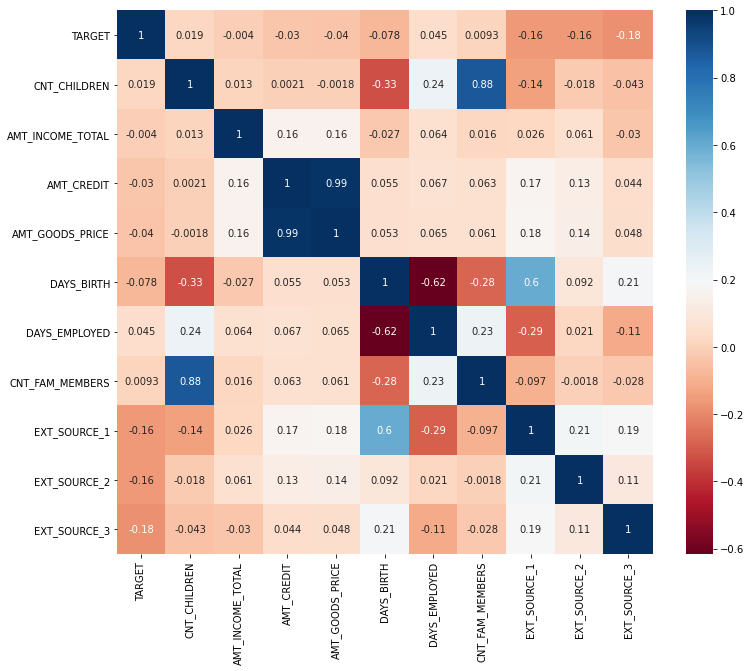

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(reduced_df.corr(), annot=True, cmap='RdBu')
plt.show()

In [ ]:
for column in reduced_df.columns:
    print("{}\t: {}".format(column, len(np.unique(reduced_df[column]))))

TARGET	: 2
NAME_CONTRACT_TYPE	: 2
CODE_GENDER	: 3
FLAG_OWN_CAR	: 2
FLAG_OWN_REALTY	: 2
CNT_CHILDREN	: 15
AMT_INCOME_TOTAL	: 2548
AMT_CREDIT	: 5603
AMT_GOODS_PRICE	: 1280
NAME_INCOME_TYPE	: 8
NAME_EDUCATION_TYPE	: 5
DAYS_BIRTH	: 17460
DAYS_EMPLOYED	: 12574
CNT_FAM_MEMBERS	: 19
EXT_SOURCE_1	: 287962
EXT_SOURCE_2	: 120491
EXT_SOURCE_3	: 61779


In [ ]:
columns = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']

def create_one_hot(reduced_df, columns):
    for column in columns:
        reduced_df = pd.concat([reduced_df, pd.get_dummies(df[column])], axis=1, join='inner')
        reduced_df = reduced_df.drop([column], axis=1)
    
    return reduced_df

reduced_df = create_one_hot(reduced_df, columns)

In [ ]:
le_name_contract_type = LabelEncoder()
reduced_df['NAME_CONTRACT_TYPE'] = le_name_contract_type.fit_transform(reduced_df['NAME_CONTRACT_TYPE'])

le_flag_own_car = LabelEncoder()
reduced_df['FLAG_OWN_CAR'] = le_flag_own_car.fit_transform(reduced_df['FLAG_OWN_CAR'])

le_flag_own_realty = LabelEncoder()
reduced_df['FLAG_OWN_REALTY'] = le_flag_own_realty.fit_transform(reduced_df['FLAG_OWN_REALTY'])

In [ ]:
reduced_df.loc[:,'AMT_GOODS_PRICE'] = reduced_df['AMT_GOODS_PRICE'].fillna(reduced_df['AMT_GOODS_PRICE'].mean())
reduced_df.loc[:,'CNT_FAM_MEMBERS'] = reduced_df['CNT_FAM_MEMBERS'].fillna(reduced_df['CNT_FAM_MEMBERS'].mean())
reduced_df.loc[:,'EXT_SOURCE_1'] = reduced_df['EXT_SOURCE_1'].fillna(reduced_df['EXT_SOURCE_1'].mean())
reduced_df.loc[:,'EXT_SOURCE_2'] = reduced_df['EXT_SOURCE_2'].fillna(reduced_df['EXT_SOURCE_2'].mean())
reduced_df.loc[:,'EXT_SOURCE_3'] = reduced_df['EXT_SOURCE_3'].fillna(reduced_df['EXT_SOURCE_3'].mean())

In [ ]:
X = reduced_df.iloc[:,1:].values
y = reduced_df['TARGET'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [ ]:
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.fit_transform(X_test)

In [ ]:
model = lgb.LGBMClassifier(n_estimators=100, class_weight='balanced', random_state=22)

model.fit(X_train_scaled, y_train, eval_metric='auc', 
          eval_set=[(X_train_scaled, y_train),(X_test_scaled, y_test)])

[1]	training's binary_logloss: 0.679178	training's auc: 0.720479	valid_1's binary_logloss: 0.674474	valid_1's auc: 0.69783
[2]	training's binary_logloss: 0.667509	training's auc: 0.726863	valid_1's binary_logloss: 0.658914	valid_1's auc: 0.705693
[3]	training's binary_logloss: 0.6578	training's auc: 0.729497	valid_1's binary_logloss: 0.645947	valid_1's auc: 0.708532
[4]	training's binary_logloss: 0.649643	training's auc: 0.731717	valid_1's binary_logloss: 0.634863	valid_1's auc: 0.708705
[5]	training's binary_logloss: 0.642788	training's auc: 0.732885	valid_1's binary_logloss: 0.625778	valid_1's auc: 0.710318
[6]	training's binary_logloss: 0.636808	training's auc: 0.734437	valid_1's binary_logloss: 0.618681	valid_1's auc: 0.712524
[7]	training's binary_logloss: 0.631579	training's auc: 0.735883	valid_1's binary_logloss: 0.61343	valid_1's auc: 0.71562
[8]	training's binary_logloss: 0.627105	training's auc: 0.73741	valid_1's binary_logloss: 0.608766	valid_1's auc: 0.718111
[9]	training's

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=22, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

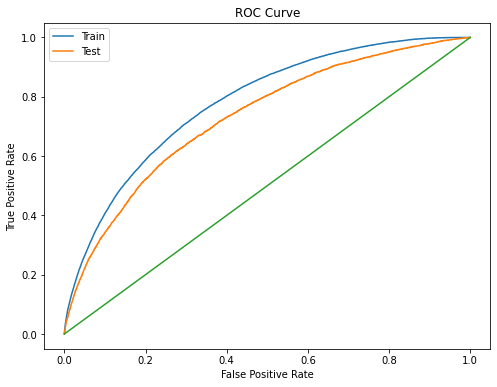

In [ ]:
# Predict the probability score
prob_train = model.predict_proba(X_train_scaled)
prob_test = model.predict_proba(X_test_scaled)

# Create train and test curve
fpr_train, tpr_train, thresh_train = roc_curve(y_train, prob_train[:,1])
fpr_test, tpr_test, thresh_test = roc_curve(y_test, prob_test[:,1])

# Create the straight line (how the graph looks like if the model does random guess instead)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

# Plot the model
plt.figure(figsize=(8,6))
plt.title('ROC Curve')
plt.plot(fpr_train, tpr_train, label='Train')
plt.plot(fpr_test, tpr_test, label='Test')
plt.plot(p_fpr, p_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [ ]:
auc_score_train = roc_auc_score(y_train, prob_train[:,1])
auc_score_test = roc_auc_score(y_test, prob_test[:,1])

print(auc_score_train)
print(auc_score_test)

0.7803782951126308
0.7304448495341964
